# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.


# 1  Загрузка данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
!pip install phik
import phik
from phik.report import plot_correlation_matrix

In [2]:
data = pd.read_csv('insurance.csv')
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
print('Количество явных дубликатов :', data.duplicated().sum())

Количество явных дубликатов : 153


In [5]:
#информация о сумме пропущенных значений
print('Количество пропущенных значений:', data.isnull().sum().sum ())

Количество пропущенных значений: 0


In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
print(data.shape)

(5000, 5)


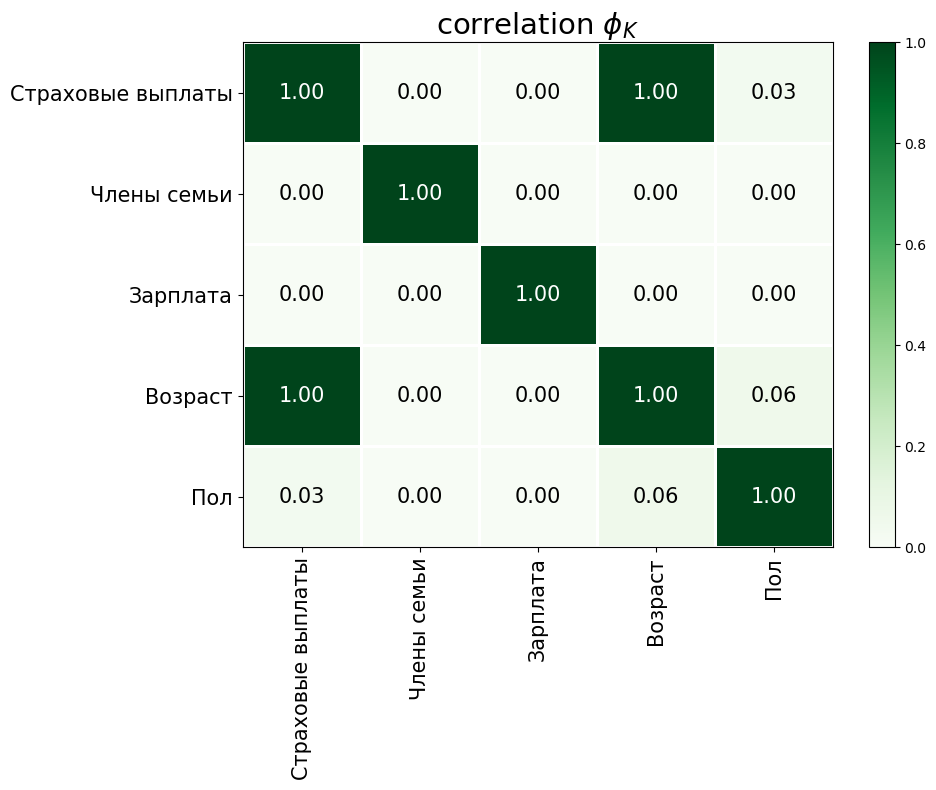

In [8]:
interval_cols = [ ]
phik_overview = data.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))

<AxesSubplot:xlabel='Пол'>

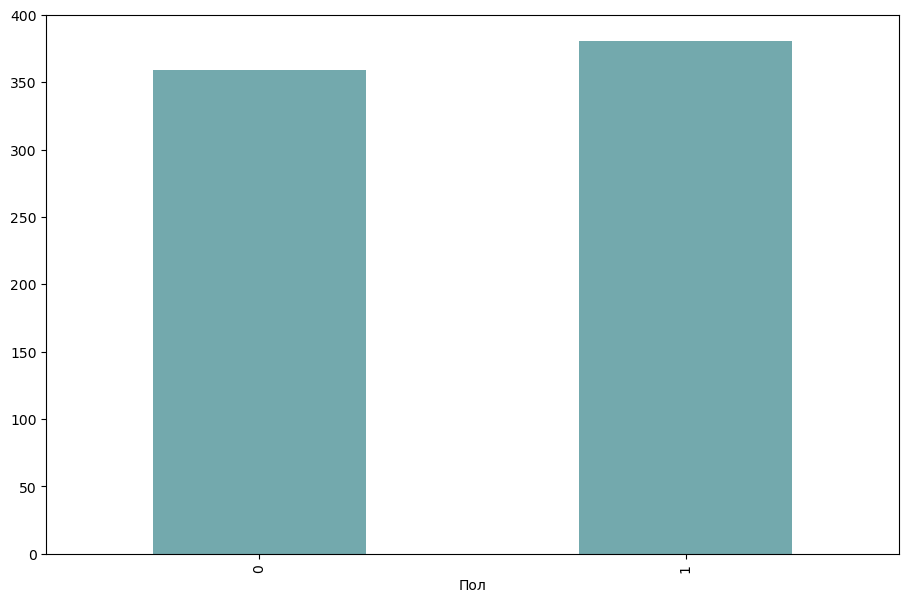

In [9]:
data.groupby('Пол')['Страховые выплаты'].sum().plot(kind='bar', figsize=(11, 7), color='#73A9AD')


<AxesSubplot:xlabel='Возраст'>

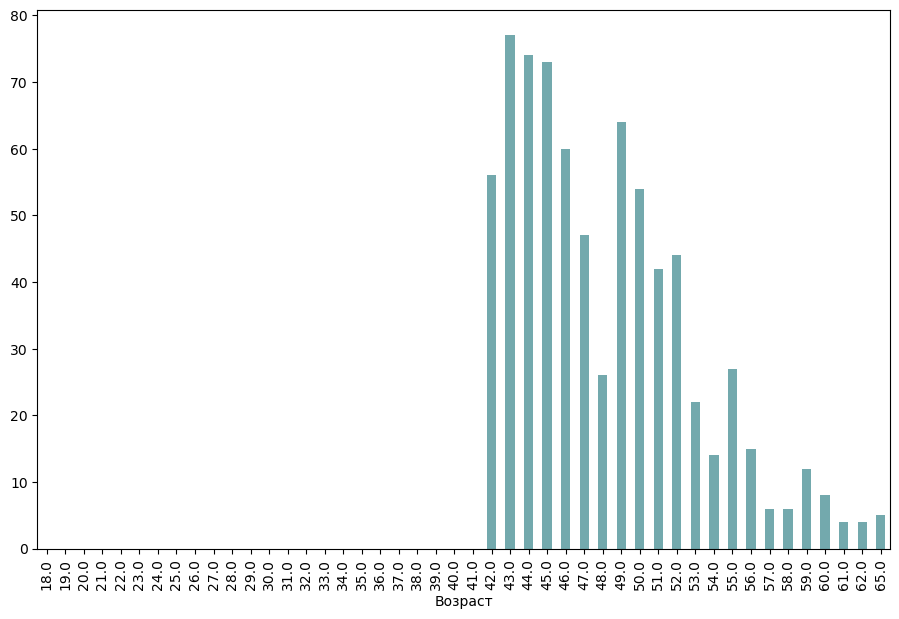

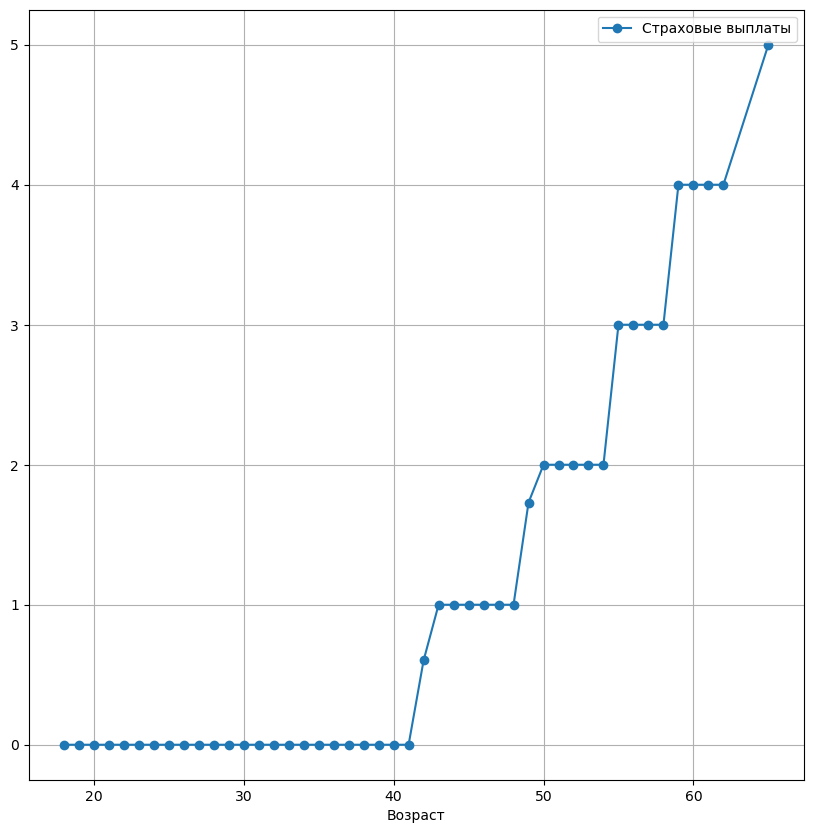

In [10]:
data.groupby('Возраст')['Страховые выплаты'].sum().plot(kind='bar', figsize=(11, 7), color='#73A9AD')
data.pivot_table(index='Возраст', values='Страховые выплаты').plot(grid=True, style='o-', figsize=(10,10))

<AxesSubplot:xlabel='Члены семьи'>

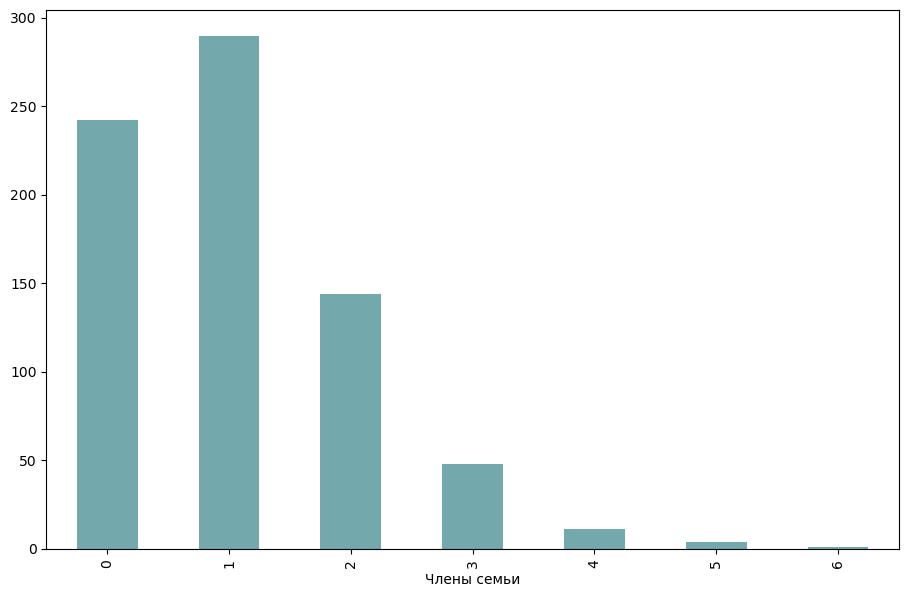

In [11]:
data.groupby('Члены семьи')['Страховые выплаты'].sum().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

In [12]:
def type_of_salary(row):
    Salary = row['Зарплата']
    if Salary < 20000.0:
        return 'D'
    if 20000.1 < Salary < 40000.0:
        return 'C'
    if 40000.1 < Salary < 60000.0:
        return 'B'
    if  Salary > 60000.1:
        return 'A'
data['Salary'] = data.apply(type_of_salary, axis=1)

<AxesSubplot:xlabel='Salary'>

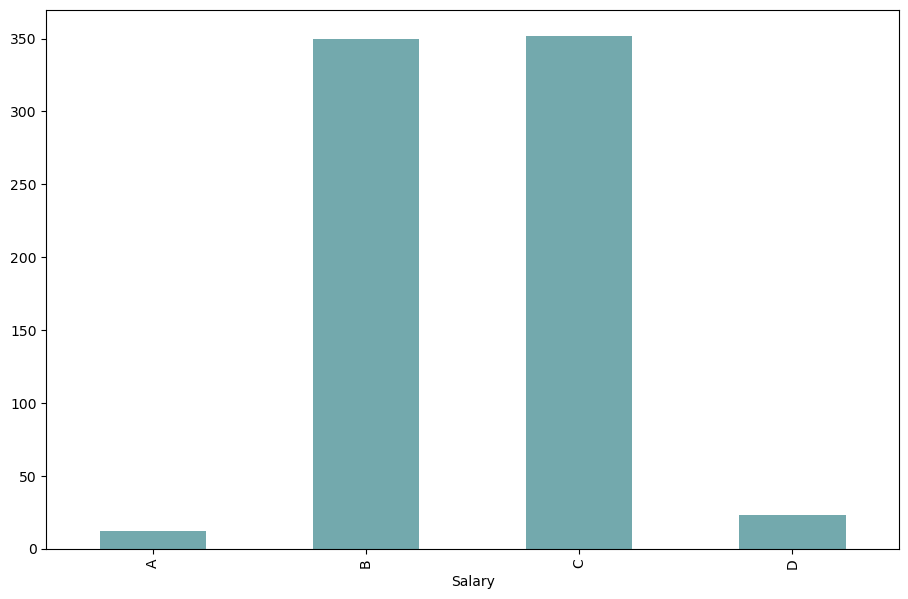

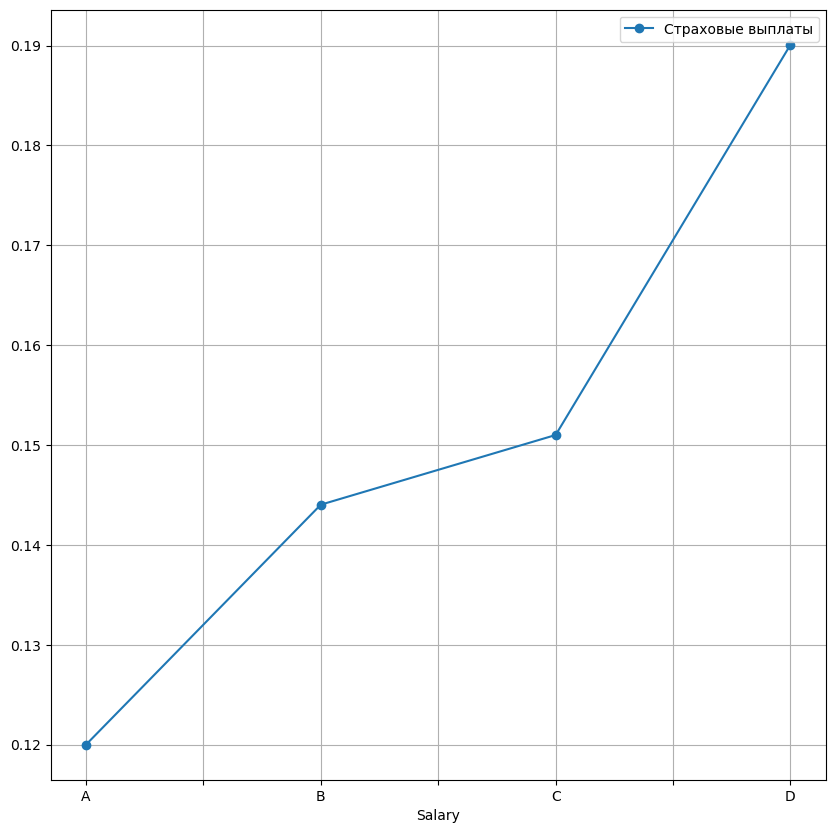

In [13]:
data.groupby('Salary')['Страховые выплаты'].sum().plot(kind='bar', figsize=(11, 7), color='#73A9AD')
data.pivot_table(index='Salary', values='Страховые выплаты').plot(grid=True, style='o-', figsize=(10,10))


In [14]:
data['Зарплата'] = data['Зарплата'].astype('int64')

In [15]:
data['Возраст'] = data['Возраст'].astype('int64')

In [16]:
data = data.drop_duplicates ()

Таблица состоит из 5 столбцов "Пол", "Возраст", "Зарплата", "Члены семьи", "Страховые выплаты". Из них зарплата и возраст имели тип данных вещественных (float64). Я произвела перевод в целочисленный (int64). Количество пропущенных значений 0. Количество явных дубликатов 153, что составляет 3,06 % от количества всех данных. Я проивела удаление дубликатов без вреда для данных. Наибольшая зависимость целевого признака страховых выплат от возраста(0.65), наименьшая от пола.Обратная зависимость страховых выплат от количества членов семьи обратная(-0.036) При этом страховые выплаты выплачиваются в наибольшей степени лицам от 42 лет, с не более 2-х членов семьи, при заработной плате менее 20 тысяч рублей, при этом наибольшее количество выплат суммарно от 40 до 60 тысяч рублей. Это можно объяснить высоким распространением среди среднего класса количества застрахованных лиц. Но корреляция небольшая дохода и Страховых выплат.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Пол                4847 non-null   int64 
 1   Возраст            4847 non-null   int64 
 2   Зарплата           4847 non-null   int64 
 3   Члены семьи        4847 non-null   int64 
 4   Страховые выплаты  4847 non-null   int64 
 5   Salary             4829 non-null   object
dtypes: int64(5), object(1)
memory usage: 265.1+ KB


In [18]:
data =  data.drop('Salary',  axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


# 2  Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$
 


** Ответ:** При умножении матриц качество линейной регрессии не ухудшается.

** Обоснование:**

 Произвожу умножение матриц:
                           
$$
F = XP
$$

где, $F$ = произведение матрицы признаков $X$ на матрицу, на которую умножаются признаки(обратимая матрица)

Введу переменные $af$- предсказания $F$, a $wf$ - вектор весов $F$
               
Вместо матрицы признаков $X$ вставлю в формулу произведение матриц $F$
$$
af = F𝑤f
$$

$$
wf = (F𝑇F)^−1F𝑇𝑦
$$
Заменю $F$ на $XP$ в двух формулах, а также в формуле предсказаний $a$ заменю wf полной формулой(правой частью равенства)
$$
af = XP((XP)^TXP)^-1(XP)^Ty
$$
 Одним из свойств операция над матрицами является:
 
 $$
 (RD)^s = D^sR^s
 $$
 
 $$
 (RD)^-1 = D^-1 R^-1
 $$
   из этого следуют преобразования в формуле предсказаний
   
  $$
  af = XP P^-1 (X^T X)^{-1} (P^T)^{-1} P^T X^T y
  $$
  


Обратная для квадратной матрицы A (англ. inverse matrix) — матрица A с верхним индексом -1, произведение которой на А равно единичной матрице
$$
AA^-1 = A^-1 A = E
$$
, поэтому произведу замену на $E$ 
($PP^-1$)

$$ 
af = XE (X^T X)^{-1}  (P^T)-1 P^T X^Ty
$$

теперь также произведу замену $P^T^-1 P^T$ на $E$
$$
af = XE (X^T X)^{-1}  E X^Ty
$$

$$
af = X (X^T X)^{-1} X^Ty
$$
$$
(X^T X)^{-1} X^Ty
$$, это формула вектора весов, поэтому заменяем формулу на w
$$
af = Xw
$$
Из этого, можно сделать вывод, что произведение матриц не меняет зависимости в линейной регрессии и предсказания остаются прежними. При этом коэфициенты будут другими, так как они основываются на другом наборе данных F.

# 3  Алгоритм преобразования

Алгоритм

В качестве защиты данных буду применять умножение матриц т. е. использование так называемого "Шифра Хилла" Шифр Хилла – полиграммный шифр подстановки (элементы исходного открытого текста заменяются зашифрованным текстом в соответствии с некоторым правилом), в котором буквы открытого текста заменяются группами с помощью линейной алгебры Алгоритм для решения это задачи будет сосоять из следующих пунктов:

    Разделение на выборки тренировочную и тестовую
    Масштабирование признаков
    Составление матрицы и ее проверка на обратимость
    Получение матрицы преобразованных признаков



In [21]:
Random_Matrix = np.random.randn(4, 4)

In [22]:
try:
    inv_matrix = np.linalg.inv(Random_Matrix)
    print('Обратная матрица к заданной существует')
except:
    print('Обратная матрица к заданной не существует')

Обратная матрица к заданной существует


Обоснование

Для дальнейшей расширофки и применения данного метода матрица должна быть невырожденной. Ключ – матрица должна иметь обратную матрицу. Такое возможно, если детерминант матрицы не равен нулю и не имеет общих делителей с основанием модуля. При проверке методом np.linalg.inv() я выяснила, что обратная матрица к заданной существует.


In [23]:
print(np.linalg.det(Random_Matrix))

1.6909361192413364


Таким образом заданная матрица Random_Matrix называется невырожденной, если определитель не равен нулю, в противном случае матрица Random_Matrix называется вырожденной. При проверке детерминант заданной матрицы равен 1.69.


# Алгоритм

In [24]:
features = data.drop('Страховые выплаты',axis=1)
target = data['Страховые выплаты']

In [25]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state= 12345)

In [26]:
#масштабирование признаков
numeric = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])

features_test[numeric]  = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None

features_train.head(5)

,Пол,Возраст,Зарплата,Члены семьи
4599,-0.984982,-0.355002,1.462162,0.719322
3882,1.015247,0.819399,1.081978,-0.193963
4705,-0.984982,-0.824762,-1.189119,-0.193963
1400,-0.984982,1.876360,-0.108597,-1.107248
728,-0.984982,1.054280,-0.738902,-0.193963


In [27]:
LR_model = LinearRegression()
LR_model.fit(features_train, target_train)
R2_LR_data = r2_score(target_test, LR_model.predict(features_test))
print("w-vector coef",LR_model.coef_)
print("Коэффициент детерминации R2 составляет", R2_LR_data)

w-vector coef [ 0.00728747  0.31061184  0.0017939  -0.01350564]
Коэффициент детерминации R2 составляет 0.4230772761583671


In [28]:
#Функция для применения алгоритма(умножение матриц)
def reform_features(features):
    reform_features = features
    n = features.shape[1]
    np.random.seed(12345)
    reform_matrix = np.random.randint(1, 10, (n,n))
    det = np.linalg.det(reform_matrix)
    while det == 0:
        np.random.seed(12345)
        reform_matrix = np.random.randint(1, 10, (n,n))
        det = np.linalg.det(cipher_matrix)
    reform_features = reform_features @ reform_matrix
    return reform_features, reform_matrix

In [29]:
display(features.head())
features, reform_matrix = reform_features(features)
display(features.head())
reform_matrix

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


,0,1,2,3
0,99452,396931,347287,49899
1,76279,304140,266095,38329
2,42174,168087,147058,21203
3,83532,333667,291948,41861
4,52371,208890,182758,26301


array([[3, 6, 2, 5],
       [6, 3, 2, 7],
       [2, 8, 7, 1],
       [3, 2, 3, 7]])

# 4  Проверка алгоритма

In [30]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [31]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

features_test  = scaler.transform(features_test)


In [32]:
model = LinearRegression()
model.fit(features_train, target_train)
R2_LR_reform_data = r2_score(target_test, model.predict(features_test))
print("w-vector coef",model.coef_)
print("Коэффициент детерминации R2 составляет ", R2_LR_reform_data)

w-vector coef [ 270.74541856  191.54849595 -404.607628    -57.69268627]
Коэффициент детерминации R2 составляет  0.4230772761583955


In [33]:
result = pd.DataFrame(data= [R2_LR_data,
                     R2_LR_reform_data], 
                     columns=['R2'], 
                     index=['R2 модели линейной регрессии',
                            'R2 модели линейной регрессии на преобразованных признаках'])
result


,R2
R2 модели линейной регрессии,0.423077
R2 модели линейной регрессии на преобразованных признаках,0.423077


При проверке алгоритма для защиты данных метрика r2 практически не изменилась, из чего можно сделать вывод о том, что данный метод применим, если детерминант заданной матрицы не равен нулю и следовательно заданная матрица имеет обратную и матрица не вырождена.


# Общий вывод по проекту

Был произведен перевод в целочисленный вид столбцов "Возраст", "Зарплата". Также я удалила дубликаты 153 из таблицы данных(3,06%) При анализе данных Наибольшая зависимость целевого признака страховых выплат от возраста(0.65).При этом страховые выплаты выплачиваются в наибольшей степени лицам от 42 лет, с не более 2-х членов семьи, при заработной плате менее 20 тысяч рублей, при этом наибольшее количество выплат суммарно от 40 до 60 тысяч рублей. Для защиты данных был применен метод "Шифр Хилла", умножение матриц. В ходе исследования математических формул я пришла к выводу о том что при произведении матриц качество модели Линейной регрессии не изменяется в худшую сторону. При применении данного алгоритма на данных страховой компании "Хоть потоп" метрика качества линейной регрессии практически не изменилась. При проверке алгоритма для защиты данных метрика r2 практически не изменилась, из чего можно сделать вывод о том, что данный метод применим, если детерминант заданной матрицы не равен нулю и следовательно заданная матрица имеет обратную и матрица не вырождена.